In [1]:
## Pacotes para abrir arquivos em pastas:
import os
import glob
import warnings
warnings.filterwarnings('ignore')

## Pacotes para arrumar os dados:
from scipy.optimize import curve_fit,least_squares
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
%matplotlib inline

In [2]:
### Função para fazer o ajuste linear com o Modelo de Regressão Linear do Scikit-Learn:
def ajuste_linear_sklearn(X_feature, y_target):
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(fit_intercept=True)
    X_feature = X_feature.reshape(-1,1)
    reg.fit(X_feature, y_target)
    y_modelado = reg.predict(X_feature)
    m = reg.coef_[0]
    b = reg.intercept_
    R2_score = reg.score(X_feature, y_target)
    return y_modelado, m, b, R2_score

In [3]:
### Listando os arquivos .pkl construídos de nuvens (intervalo de amostragem original, igual a 1 seg):
pasta_selecao = '/media/andre/SAMSUNG/03_HD_500GB_WD/G1_Micael/Dataframes_construidos2/'
arquivos = sorted(glob.glob(pasta_selecao+'Nuvens?????????2014_1seg.pkl'))

### Lendo os .pkl de cada dia com o pandas (como dataframes) e guardando eles na lista dfs:
dfs = [pd.read_pickle(a) for a in arquivos]

In [4]:
### Filtrando os pontos em que gotas de nuvem foram detectadas, ou seja, pontos nos quais há nuvens:
dfs_com_nuvem = []
for i in range(len(dfs)):
    filtro1 = dfs[i][(dfs[i]['conc(#_L)']>0.0000000000) & (dfs[i]['LWC_083']>0.0) & (dfs[i]['LWC_021']>0.0)]
    dfs_com_nuvem.append(filtro1)

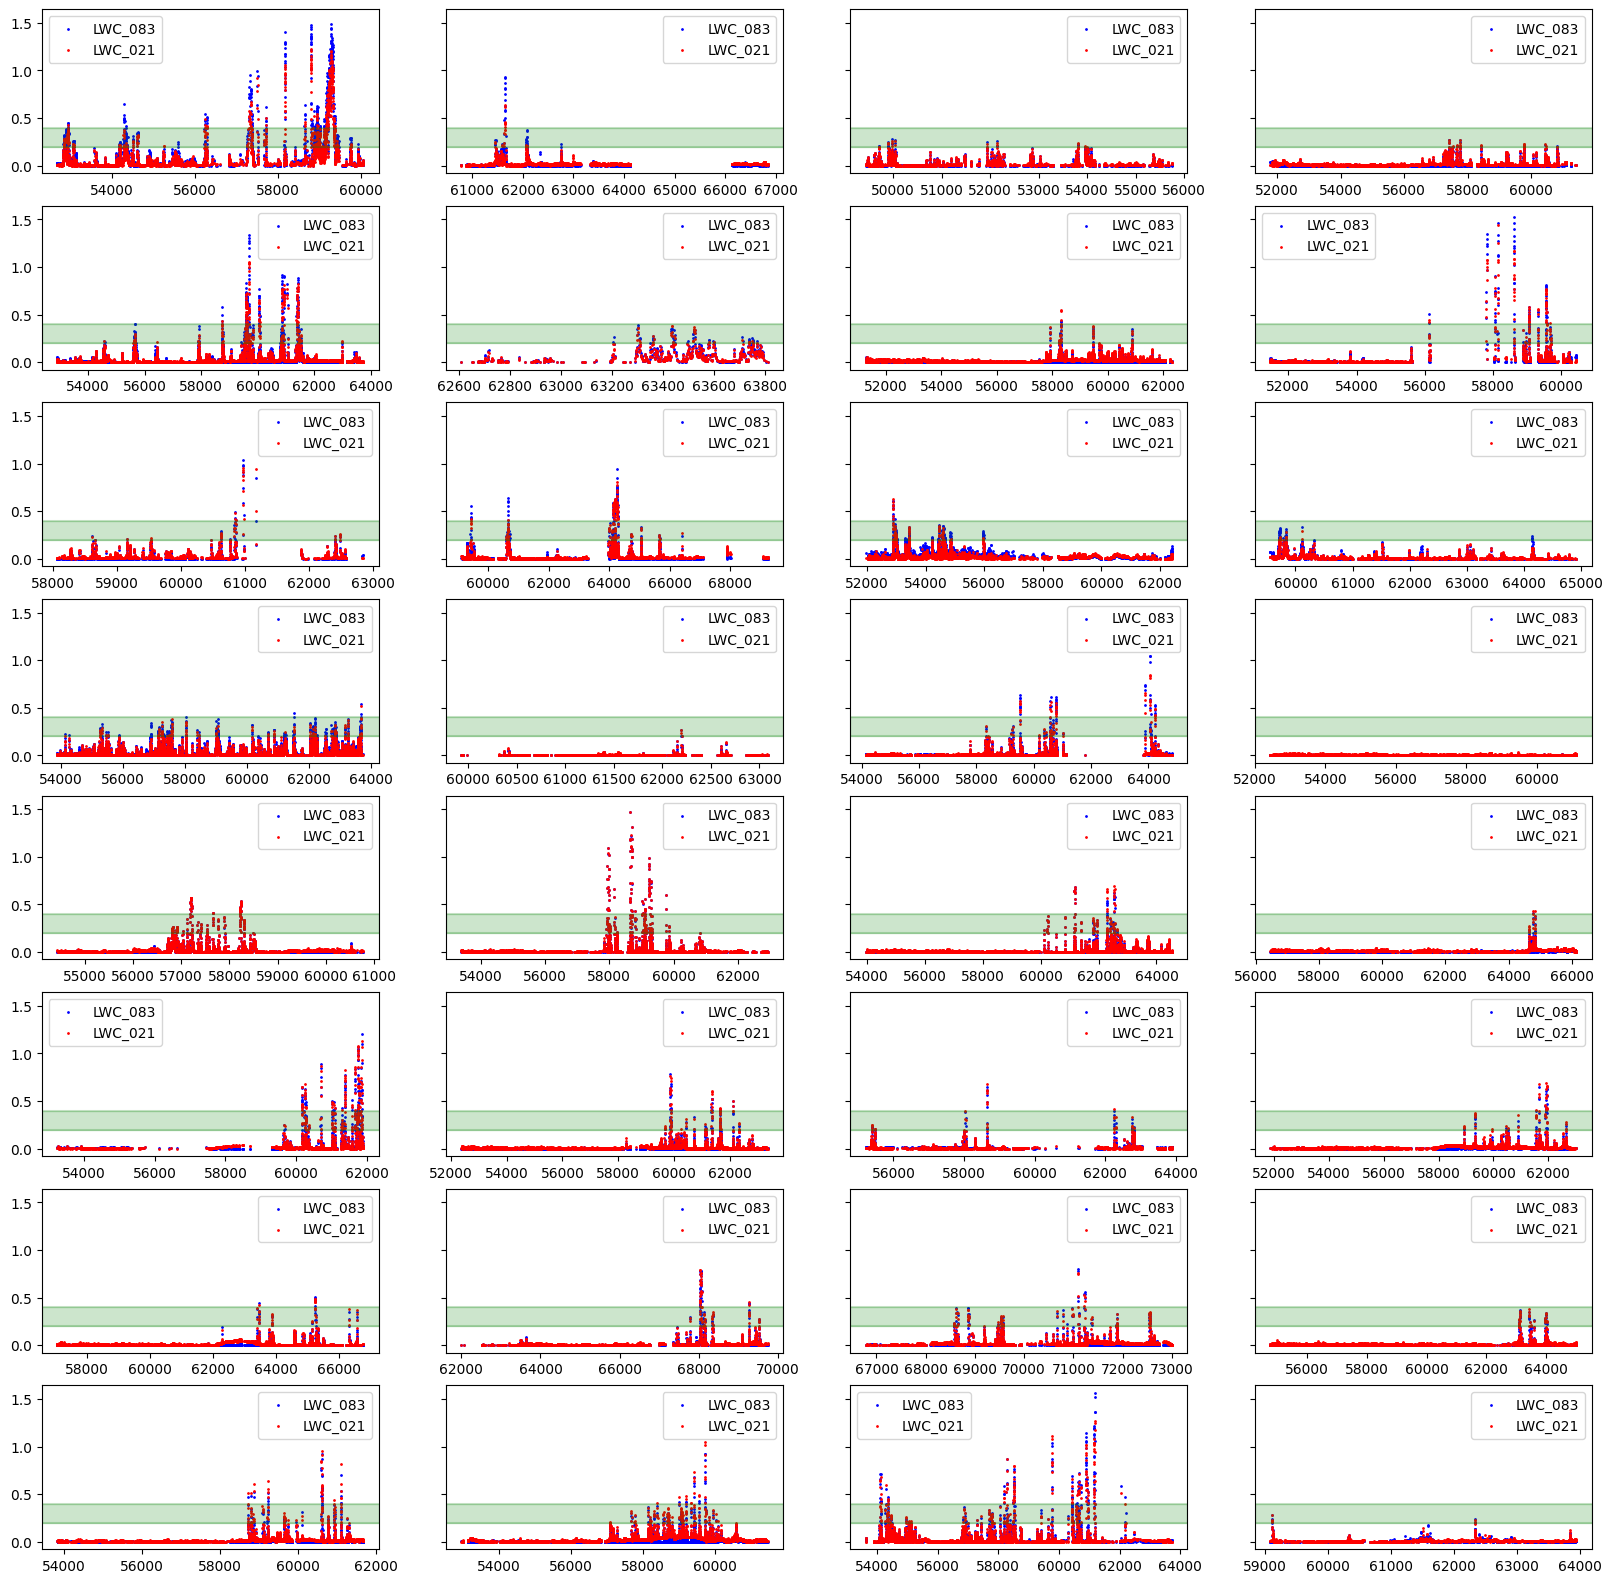

In [5]:
### Olhada rápida na série temporal dos dados de LWC_021 e LWC_083 para todos os 32 dias (inclui os dois IOP), 
### só que agora mostrando somente os dados que caem dentro da caixa lat/lon em torno do T3:
fig, axs = plt.subplots(8, 4, figsize=(20, 20), facecolor='white', sharey=True, sharex=False)
axes = [axs[0][0], axs[0][1], axs[0][2], axs[0][3],
        axs[1][0], axs[1][1], axs[1][2], axs[1][3],
        axs[2][0], axs[2][1], axs[2][2], axs[2][3],
        axs[3][0], axs[3][1], axs[3][2], axs[3][3],
        axs[4][0], axs[4][1], axs[4][2], axs[4][3],
        axs[5][0], axs[5][1], axs[5][2], axs[5][3],
        axs[6][0], axs[6][1], axs[6][2], axs[6][3],
        axs[7][0], axs[7][1], axs[7][2], axs[7][3]]

tf = 10
for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].scatter(dfs_com_nuvem[i]['pts_tempo'], dfs_com_nuvem[i]['LWC_083'], s=1, color='blue', label='LWC_083')
    axes[i].scatter(dfs_com_nuvem[i]['pts_tempo'], dfs_com_nuvem[i]['LWC_021'], s=1, color='red', label='LWC_021')
    
    axes[i].legend(loc='best')
    axes[i].axhline(y=0.2, color='g', linestyle='-', alpha=0.2)
    axes[i].axhline(y=0.4, color='g', linestyle='-', alpha=0.2)
    axes[i].axhspan(0.2, 0.4, color='g', alpha=0.2)

In [6]:
dfs_liquidas = []
for i in range(len(dfs_com_nuvem)):
    iwc = dfs_com_nuvem[i]['TWC']-dfs_com_nuvem[i]['LWC_083']
#     iwc = dfs_com_nuvem[i]['TWC']-dfs_com_nuvem[i]['LWC_021']
    linhas_excluir = []
    for j in range(len(iwc)):
        ### Se iwc > 0, tem gelo na nuvem:
        if iwc[j] > 0:
            linhas_excluir.append(j)
    liquida = dfs_com_nuvem[i].drop(dfs_com_nuvem[i].index[linhas_excluir])
    dfs_liquidas.append(liquida)

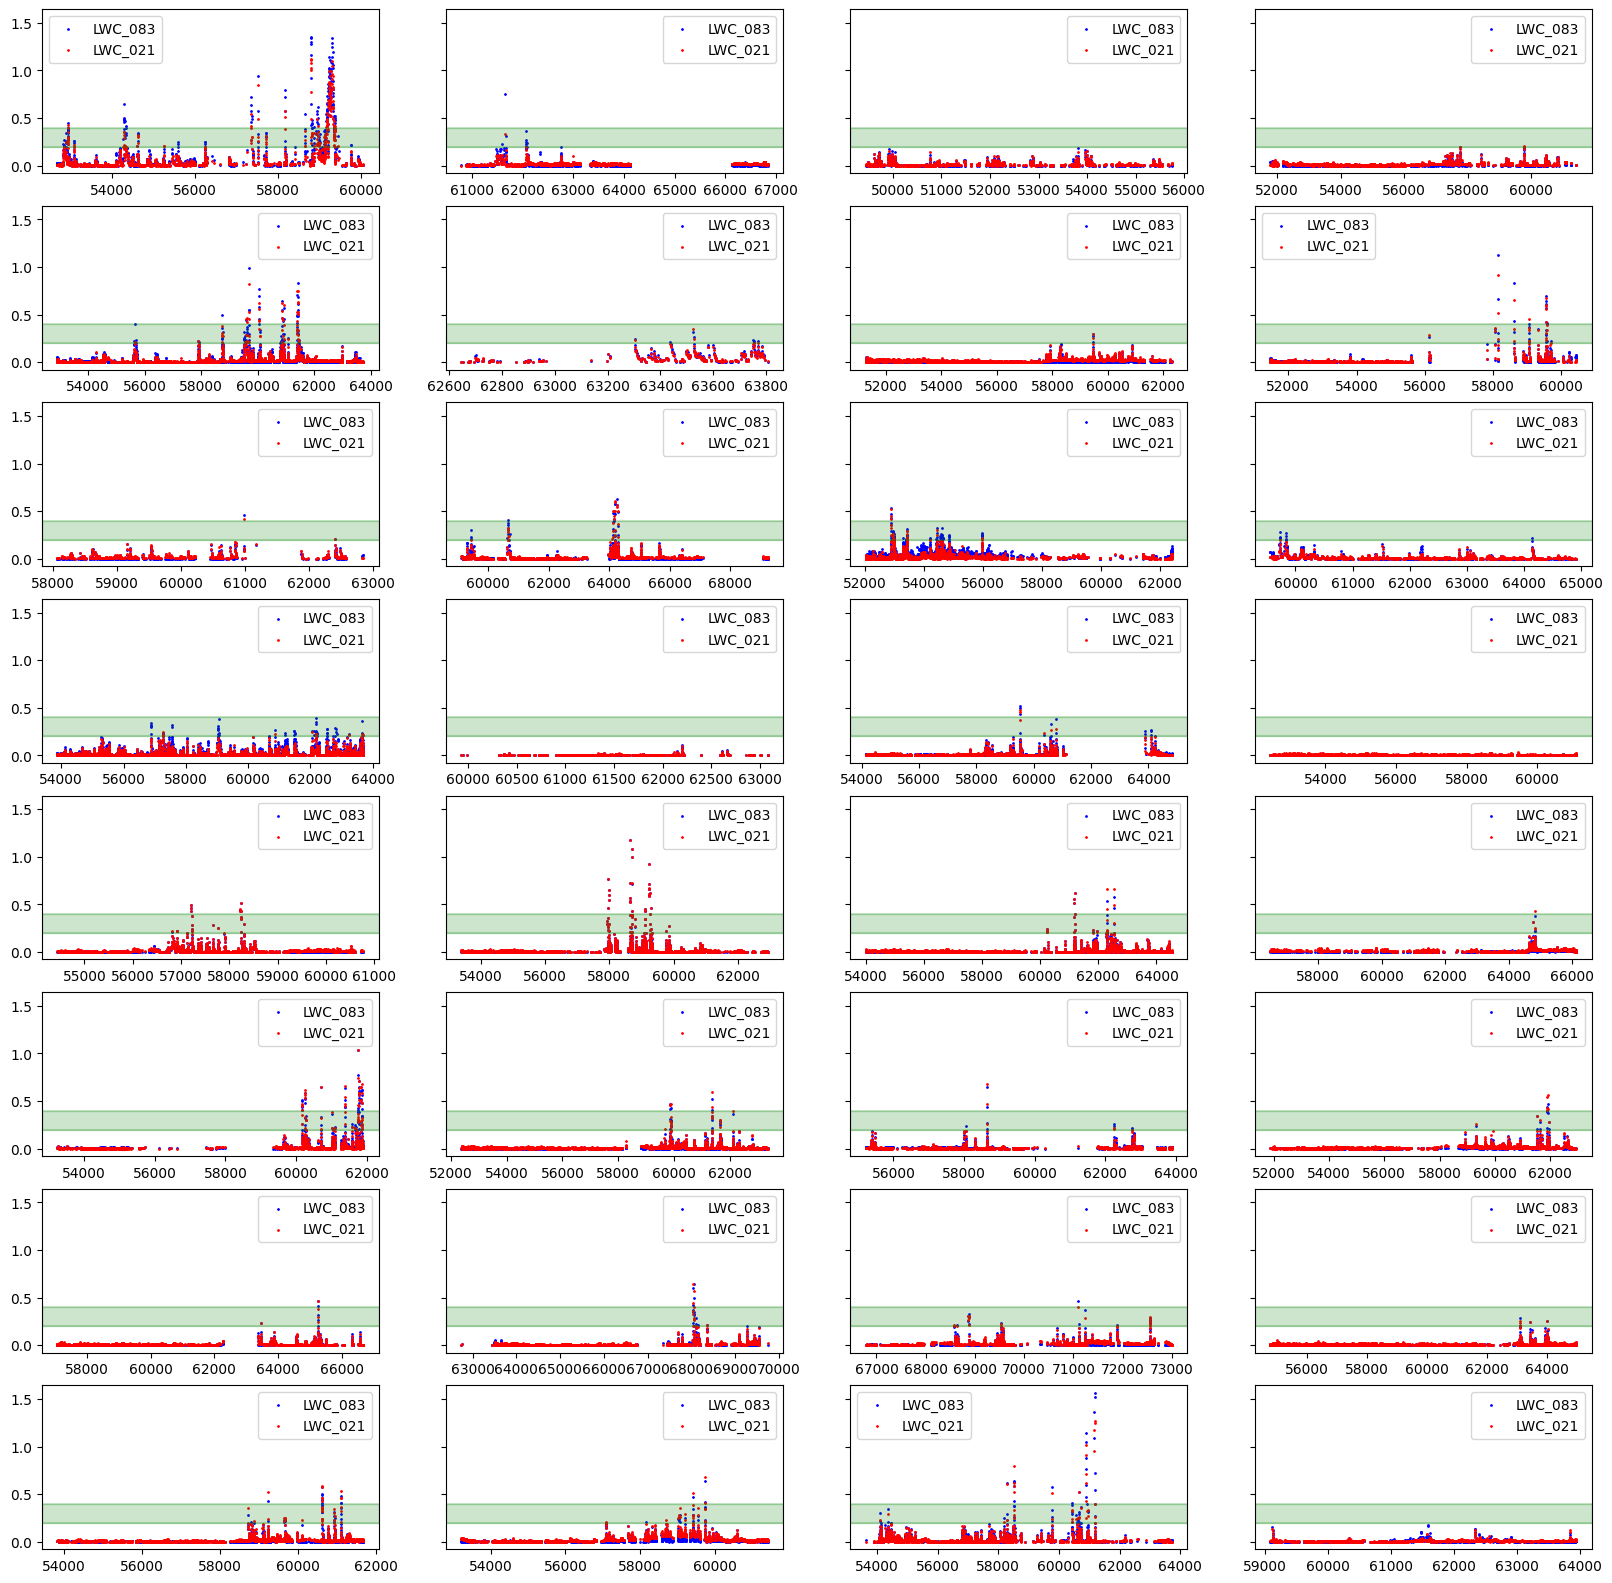

In [7]:
### Olhada rápida na série temporal dos dados de LWC_021 e LWC_083 para todos os 32 dias (inclui os dois IOP), 
### só que agora mostrando somente os dados que caem dentro da caixa lat/lon em torno do T3:
fig, axs = plt.subplots(8, 4, figsize=(20, 20), facecolor='white', sharey=True, sharex=False)
axes = [axs[0][0], axs[0][1], axs[0][2], axs[0][3],
        axs[1][0], axs[1][1], axs[1][2], axs[1][3],
        axs[2][0], axs[2][1], axs[2][2], axs[2][3],
        axs[3][0], axs[3][1], axs[3][2], axs[3][3],
        axs[4][0], axs[4][1], axs[4][2], axs[4][3],
        axs[5][0], axs[5][1], axs[5][2], axs[5][3],
        axs[6][0], axs[6][1], axs[6][2], axs[6][3],
        axs[7][0], axs[7][1], axs[7][2], axs[7][3]]

tf = 10
for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].scatter(dfs_liquidas[i]['pts_tempo'], dfs_liquidas[i]['LWC_083'], s=1, color='blue', label='LWC_083')
    axes[i].scatter(dfs_liquidas[i]['pts_tempo'], dfs_liquidas[i]['LWC_021'], s=1, color='red', label='LWC_021')
    
    axes[i].legend(loc='best')
    axes[i].axhline(y=0.2, color='g', linestyle='-', alpha=0.2)
    axes[i].axhline(y=0.4, color='g', linestyle='-', alpha=0.2)
    axes[i].axhspan(0.2, 0.4, color='g', alpha=0.2)

In [8]:
dfs_liquidas[0].columns

Index(['UTC', 'pts_tempo', 'Lat', 'Lon', 'GPS_Alt', 'PSAP_ABS_522nm',
       'NEPH_TS_550nm', 'NEPH_BS_550nm', 'TWC', 'LWC_083', 'LWC_021',
       'conc(#_L)', 'C:0-1.5', 'C:1.5-3', 'C:3-4.5', 'C:4.5-6', 'C:6-8',
       'C:8-10', 'C:10-12', 'C:12-14', 'C:14-16', 'C:16-18', 'C:18-21',
       'C:21-24', 'C:24-27', 'C:27-30', 'C:30-33', 'C:33-36', 'C:36-39',
       'C:39-42', 'C:42-46', 'C:46-50', 'C:50-150'],
      dtype='object')

In [9]:
### Função que calcula os reffs pela razão das integrais, onde cada r é a média dos limites de cada bin de tam:
def reffs_pelas_integrais(d):
    #################################################################################################
    # Pegando só as colunas com as concentrações numéricas de gotas nos bins de raio efetivo da gota:
    colsc = list(d.columns)[12:-1]
    r0s, r1s = [], []
    for n in colsc:
        r0 = n.split(':')[1].split('-')[0]
        r0s.append(float(r0))
        r1 = n.split(':')[1].split('-')[1]
        r1s.append(float(r1))
    rmedios, rmediosquadrado, rmedioscubo = [], [], []
    for i in range(len(r0s)):
        rmedio = (r0s[i]+r1s[i])/2
        rmedios.append(rmedio)
        rmediosquadrado.append(rmedio**2)
        rmedioscubo.append(rmedio**3)
    ###################################################################################################
    diccubo, dicquadrado = {}, {}
    for i in range(len(colsc)):
        diccubo.update({rmedios[i]:rmedioscubo[i]*d[colsc[i]]})
        dicquadrado.update({rmedios[i]:rmediosquadrado[i]*d[colsc[i]]})
    dfcubo = pd.DataFrame(diccubo)
    dfquadrado = pd.DataFrame(dicquadrado)
    reffs = []
    for t in range(len(dfquadrado)):
        reffs.append(np.sum(dfcubo.iloc[t])/np.sum(dfquadrado.iloc[t]))
    return reffs

In [10]:
################################ CHAMANDO A FUNÇÃO: 
integrais2 = [reffs_pelas_integrais(i) for i in dfs_liquidas]

In [11]:
for i in range(len(dfs_liquidas)):
    dfs_liquidas[i].insert(33, "reff_int", integrais2[i], True)

In [12]:
lwc083_iop1, reff_integrais2_iop1 = [], []
for i in np.arange(0, 13, 1):
    for v1 in dfs_liquidas[i]['LWC_083'].values:
#     for v1 in dfs_liquidas[i]['LWC_021'].values:
        lwc083_iop1.append(v1)
    for v2 in dfs_liquidas[i]['reff_int'].values:
        reff_integrais2_iop1.append(v2)
        
lwc083_iop2, reff_integrais2_iop2 = [], []
for ii in np.arange(13, 32, 1):
    for v11 in dfs_liquidas[ii]['LWC_083'].values:
#     for v11 in dfs_liquidas[ii]['LWC_021'].values:
        lwc083_iop2.append(v11)
    for v22 in dfs_liquidas[ii]['reff_int'].values:
        reff_integrais2_iop2.append(v22)

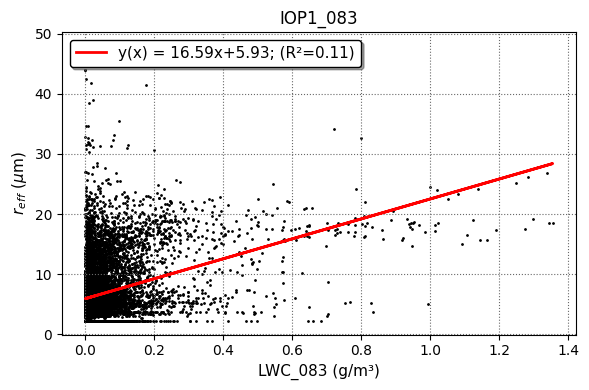

In [13]:
##################################### IOP1 LWC_083:
x = np.array(lwc083_iop1)
y = np.array(reff_integrais2_iop1)
y_ajustado, m, b, R2 = ajuste_linear_sklearn(x, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.scatter(x, y, color='black', s=1)
ax.plot(x, y_ajustado, color='red', linewidth=2, label=u'y(x) = {:.2f}x{:+.2f}; (R²={:.2f})'.format(m,b,R2))
ax.legend(loc='upper left', ncol=1, fontsize=11, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle=':', color='dimgray')
ax.set_xlabel('LWC_083 (g/m³)', fontsize=11)
ax.set_ylabel('$r_e$$_f$$_f$ ($\mu$m)', fontsize=11)
ax.set_title("IOP1_083".format(m, b, R2), fontsize=12)
ax.tick_params(labelsize=10)
fig.tight_layout()

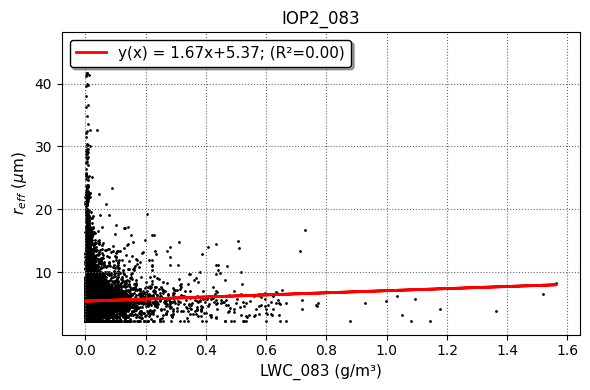

In [14]:
##################################### IOP2 LWC_083:
x = np.array(lwc083_iop2)
y = np.array(reff_integrais2_iop2)
y_ajustado, m, b, R2 = ajuste_linear_sklearn(x, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.scatter(x, y, color='black', s=1)
ax.plot(x, y_ajustado, color='red', linewidth=2, label=u'y(x) = {:.2f}x{:+.2f}; (R²={:.2f})'.format(m,b,R2))
ax.legend(loc='upper left', ncol=1, fontsize=11, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle=':', color='dimgray')
ax.set_xlabel('LWC_083 (g/m³)', fontsize=11)
ax.set_ylabel('$r_e$$_f$$_f$ ($\mu$m)', fontsize=11)
ax.set_title("IOP2_083".format(m, b, R2), fontsize=12)
ax.tick_params(labelsize=10)
fig.tight_layout()

In [15]:
#################################################

In [16]:
### Filtros Micael (1° artigo):
dfs_filtros_lwc = []
for i in range(len(dfs_liquidas)):
    fil = dfs_liquidas[i][(dfs_liquidas[i]['LWC_083']>=0.02) & ((dfs_liquidas[i]['conc(#_L)']/1000)>0.3)]
    dfs_filtros_lwc.append(fil)

In [17]:
### Juntando os dados de cada IOP:
lwc083_iop1, reff_integrais2_iop1 = [], []
for i in np.arange(0, 13, 1):
    for v1 in dfs_filtros_lwc[i]['LWC_083'].values:
#     for v1 in dfs_filtros_lwc[i]['LWC_021'].values:
        lwc083_iop1.append(v1)
    for v2 in dfs_filtros_lwc[i]['reff_int'].values:
        reff_integrais2_iop1.append(v2)
        
lwc083_iop2, reff_integrais2_iop2 = [], []
for ii in np.arange(13, 32, 1):
    for v11 in dfs_filtros_lwc[ii]['LWC_083'].values:
#     for v11 in dfs_filtros_lwc[ii]['LWC_021'].values:
        lwc083_iop2.append(v11)
    for v22 in dfs_filtros_lwc[ii]['reff_int'].values:
        reff_integrais2_iop2.append(v22)

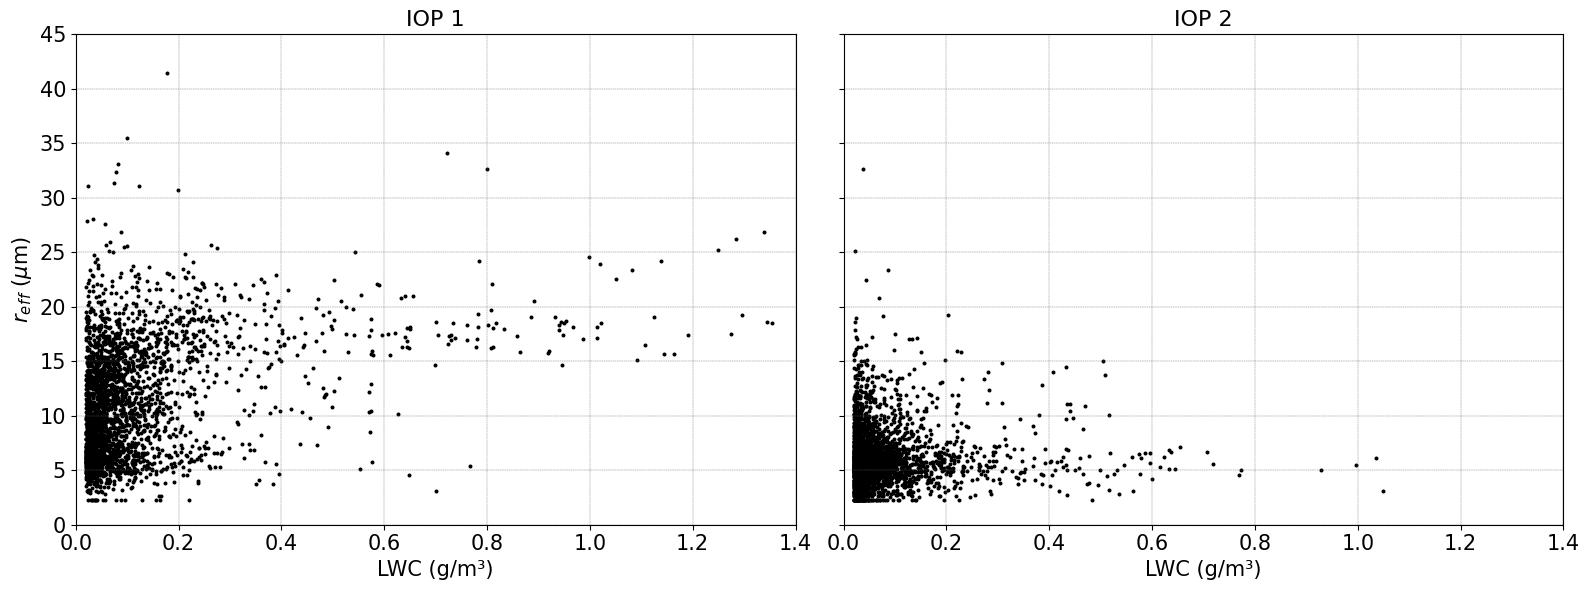

In [18]:
#### Fazendo a figura e os eixos (os "axs"):
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 6), facecolor='white')
axes = [axs[0], axs[1]]
tf = 15

for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].grid(b=True, which='both', axis='both', color='dimgray', linestyle='--', linewidth=0.3)
    axes[i].set(xlim=[0, 1.4], ylim=[0, 45], facecolor='white')
#     axes[i].xaxis.set_major_locator(ticker.MultipleLocator(200))
#     axes[i].yaxis.set_major_locator(ticker.MultipleLocator(200))

    if i == 0:
        axes[i].set_title('IOP 1', fontsize=tf+1, color='black')
        axes[i].set_ylabel(u'$r_e$$_f$$_f$ ($\mu$m)', fontsize=tf, color='black')
        axes[i].set_xlabel(u'LWC (g/m³)', fontsize=tf, color='black')
        x = np.array(lwc083_iop1)
        y = np.array(reff_integrais2_iop1)
        y_ajustado, m, b, R2 = ajuste_linear_sklearn(x, y)
        axes[i].scatter(x, y, color='black', s=3.5)
        axes[i].tick_params(labelsize=tf)
    if i == 1:
        axes[i].set_title('IOP 2', fontsize=tf+1, color='black')
        axes[i].set_xlabel(u'LWC (g/m³)', fontsize=tf, color='black')
        x2 = np.array(lwc083_iop2)
        y2 = np.array(reff_integrais2_iop2)
        y_ajustado2, m2, b2, R22 = ajuste_linear_sklearn(x2, y2)
        axes[i].scatter(x2, y2, color='black', s=3.5)
        axes[i].tick_params(labelsize=tf)
    
plt.tight_layout()
# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Dispersão_LWCXreff_Pontos.png', 
#             dpi=400, bbox_inches='tight', facecolor='white')

In [21]:
############################### Medianas nos bins de LWC83 IOP1:
binslwc = np.arange(0.02, 1.02, 0.05)
# binslwc = np.arange(0.2, 1.05, 0.04)
# binslwc = np.arange(0.255, 0.315, 0.001)

dic = {'lwc83':lwc083_iop1 ,'reff':reff_integrais2_iop1}
iop1 = pd.DataFrame(dic)

medianas_lwc, medianas_reff = [], []
for i in range(len(binslwc)-1):
    if i == len(binslwc)-3:
        faixa = iop1[(iop1['lwc83']>=binslwc[i]) & (iop1['lwc83']<=binslwc[i+1])]
        medianas_lwc.append(faixa.describe()['lwc83'][5])
        medianas_reff.append(faixa.describe()['reff'][5])
    else:
        faixa = iop1[(iop1['lwc83']>=binslwc[i]) & (iop1['lwc83']<binslwc[i+1])]
        medianas_lwc.append(faixa.describe()['lwc83'][5])
        medianas_reff.append(faixa.describe()['reff'][5])
        
dic_medianas = {'medianaslwc83':medianas_lwc, 'medianasreff':medianas_reff}
medianas_iop1 = pd.DataFrame(dic_medianas)
medianas_iop1.dropna(how='any', inplace=True)
# medianas_iop1

# medianas_iop1.boxplot()

In [22]:
################ Medianas nos bins de LWC83 IOP2:
binslwc = np.arange(0.02, 1.02, 0.05)
# binslwc = np.arange(0.2, 1.05, 0.04)
# binslwc = np.arange(0.255, 0.315, 0.001)

dic = {'lwc83':lwc083_iop2 ,'reff':reff_integrais2_iop2}
iop2 = pd.DataFrame(dic)

medianas_lwc, medianas_reff = [], []
for i in range(len(binslwc)-1):
    if i == len(binslwc)-3:
        faixa = iop2[(iop2['lwc83']>=binslwc[i]) & (iop2['lwc83']<=binslwc[i+1])]
        medianas_lwc.append(faixa.describe()['lwc83'][5])
        medianas_reff.append(faixa.describe()['reff'][5])
    else:
        faixa = iop2[(iop2['lwc83']>=binslwc[i]) & (iop2['lwc83']<binslwc[i+1])]
        medianas_lwc.append(faixa.describe()['lwc83'][5])
        medianas_reff.append(faixa.describe()['reff'][5])
        
dic_medianas = {'medianaslwc83':medianas_lwc, 'medianasreff':medianas_reff}
medianas_iop2 = pd.DataFrame(dic_medianas)
medianas_iop2.dropna(how='any', inplace=True)
# medianas_iop2

# medianas_iop2.boxplot()

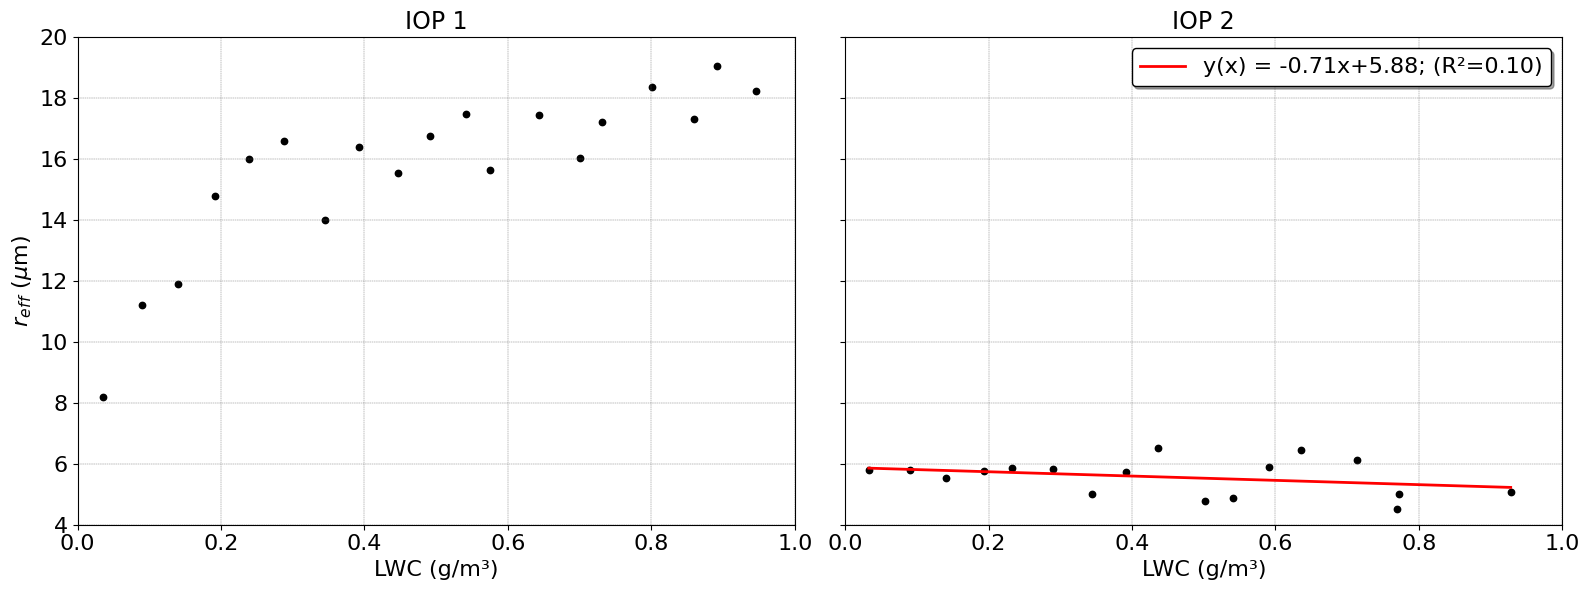

In [23]:
#### Fazendo a figura e os eixos (os "axs"):
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 6), facecolor='white')
axes = [axs[0], axs[1]]
tf = 16

for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].grid(b=True, which='both', axis='both', color='dimgray', linestyle='--', linewidth=0.3)
    axes[i].set(xlim=[0, 1.0], ylim=[4, 20], facecolor='white')
#     axes[i].xaxis.set_major_locator(ticker.MultipleLocator(200))
#     axes[i].yaxis.set_major_locator(ticker.MultipleLocator(200))

    if i == 0:
        axes[i].set_title('IOP 1', fontsize=tf+1, color='black')
        axes[i].set_ylabel(u'$r_e$$_f$$_f$ ($\mu$m)', fontsize=tf, color='black')
        axes[i].set_xlabel(u'LWC (g/m³)', fontsize=tf, color='black')
        x = np.array(medianas_iop1['medianaslwc83'])
        y = np.array(medianas_iop1['medianasreff'])
        y_ajustado, m, b, R2 = ajuste_linear_sklearn(x, y)
        axes[i].scatter(x, y, color='black', s=21)
#         axes[i].plot(x, y_ajustado, color='red', linewidth=2, 
#                      label=u'y(x) = {:.2f}x{:+.2f}; (R²={:.2f})'.format(m,b,R2))
#         axes[i].legend(loc='lower right', ncol=1, fontsize=tf, fancybox='True', shadow='True',
#                        facecolor='white', edgecolor='black')
        axes[i].tick_params(labelsize=tf)
    if i == 1:
        axes[i].set_title('IOP 2', fontsize=tf+1, color='black')
        axes[i].set_xlabel(u'LWC (g/m³)', fontsize=tf, color='black')
        x2 = np.array(medianas_iop2['medianaslwc83'])
        y2 = np.array(medianas_iop2['medianasreff'])
        y_ajustado2, m2, b2, R22 = ajuste_linear_sklearn(x2, y2)
        axes[i].scatter(x2, y2, color='black', s=21)
        axes[i].plot(x2, y_ajustado2, color='red', linewidth=2, 
                     label=u'y(x) = {:.2f}x{:+.2f}; (R²={:.2f})'.format(m2,b2,R22))
        axes[i].legend(loc='best', ncol=1, fontsize=tf, fancybox='True', shadow='True',
                       facecolor='white', edgecolor='black')
        axes[i].tick_params(labelsize=tf)
    
plt.tight_layout()
# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Dispersão_LWCXreff_Medianas.png', 
#             dpi=400, bbox_inches='tight', facecolor='white')

a = 8.308 ± 0.470
b = 8.203 ± 0.497
R2 = 0.80034189


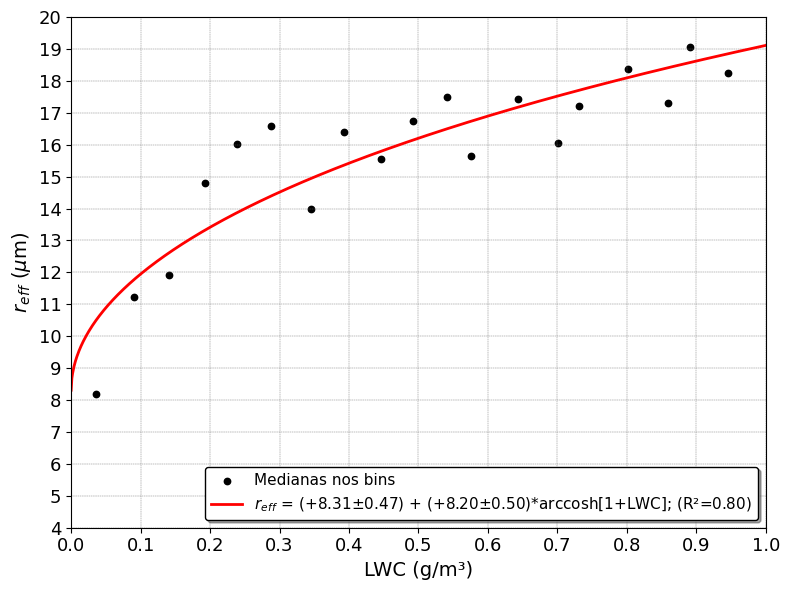

In [57]:
######################################################################### Ajuste:
x_datos = np.array(medianas_iop1['medianaslwc83'])
y_datos = np.array(medianas_iop1['medianasreff'])

### Equação da curva que será ajustada:
def modelo(x, a, b):
    return a+(b*np.arccosh(1+x))

### Parámetros iniciales con los que vamos a iniciar el proceso de fiteo:
parametros_iniciales=[1, 1]

### Fittando a curva:
popt, pcov = curve_fit(modelo, x_datos, y_datos, p0=parametros_iniciales)


#########################################################################  Fazendo o gráfico:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
tf = 14
ax.scatter(x_datos, y_datos, s=21, color='black', label='Medianas nos bins')
# ax.scatter(x_datos, y_datos, s=12, color='black')

### Incerteza dos parâmetros ajustados:
nombres_de_param = ['a','b']
pstd = np.sqrt(np.diag(pcov))
for i, param in enumerate(popt):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd[i]/2))
ss_res = np.sum( (y_datos-modelo(x_datos,*popt))**2  )
ss_tot = np.sum( (y_datos-np.mean(y_datos))**2  )
### Cálculo do R²:
R2 = 1-(ss_res/ss_tot)
print('R2 = {:10.8f}'.format(R2))


# y(x) = a + b*arccosh[1+x]


x_modelo  = np.linspace(0.0, 1.02, 1000)
ax.plot(x_modelo, modelo(x_modelo, *popt), color='red', linewidth=2,
    label=u'$r_e$$_f$$_f$ = ({:+.2f}±{:.2f}) + ({:+.2f}±{:.2f})*arccosh[1+LWC]; (R²={:.2f})'.format(popt[0],
                                                                                                    pstd[0]/2,
                                                                                                    popt[1],
                                                                                                    pstd[1]/2,
                                                                                                    R2))
ax.legend(loc='lower right', ncol=1, fontsize=tf-3, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle='--', color='dimgray', linewidth=0.3)
ax.set_xlabel('LWC (g/m³)', fontsize=tf)
ax.set_ylabel('$r_e$$_f$$_f$ ($\mu$m)', fontsize=tf)
# ax.set_title("IOP1_083", fontsize=12)
ax.tick_params(labelsize=tf-1)
ax.set_ylim([4, 20])
ax.set_xlim([0.0, 1.0])
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

# pontos = np.linspace(0.1,0.4)
# ax.plot(pontos, pontos, color='grey', linestyle='--', linewidth=0.7)

fig.tight_layout()
plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Dispersão_LWCXreff_Medianas_ArccosIOP1.png', 
            dpi=400, bbox_inches='tight', facecolor='white')